In [ ]:
# Mengimport semua library yang diperlukan untuk program
import torch  # Library utama PyTorch
import torch.nn as nn  # Modul Neural Network dari PyTorch
import torch.optim as optim  # Modul optimisasi dari PyTorch
import torchvision  # Library untuk vision tasks di PyTorch
import torchvision.transforms as transforms  # Modul untuk melakukan transformasi pada data gambar
from torch.utils.data import DataLoader  # Kelas DataLoader untuk memuat data secara efisien

In [ ]:
#setup device ke GPU apabila memungkinkan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Mendefinisikan model LeNet5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        # Layer konvolusi pertama: 1 input channel, 6 output channels, kernel size 5x5
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.relu1 = nn.ReLU()  # Fungsi aktivasi ReLU
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling dengan kernel size 2x2

        # Layer konvolusi kedua: 6 input channels, 16 output channels, kernel size 5x5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu2 = nn.ReLU()  # Fungsi aktivasi ReLU
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling dengan kernel size 2x2

        # Fully connected layer pertama: 16*5*5 input features, 120 output features
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()  # Fungsi aktivasi ReLU

        # Fully connected layer kedua: 120 input features, 84 output features
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()  # Fungsi aktivasi ReLU

        # Fully connected layer ketiga: 84 input features, 10 output features (sesuai dengan jumlah kelas)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Propagasi maju (forward pass) melalui lapisan-lapisan model
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # Meratakan tensor menjadi vektor untuk lapisan fully connected
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Mendefinisikan transformasi data untuk MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Mengubah gambar menjadi representasi tensor
])

In [ ]:
# Memuat dataset MNIST untuk pelatihan dan pengujian
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 87409120.76it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30321825.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23990437.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3291383.68it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Membuat DataLoader untuk dataset pelatihan dan pengujian
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Menginisialisasi model LeNet5, kriteria (loss function), dan optimizer
model = LeNet5().to(device)  # Membuat objek model LeNet5 dan memindahkannya ke perangkat yang telah ditentukan (GPU atau CPU)
criterion = nn.CrossEntropyLoss()  # Menggunakan CrossEntropyLoss sebagai kriteria (loss function)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Menggunakan optimizer Adam dengan laju pembelajaran 0.001

In [ ]:
# Melakukan loop pelatihan (training) dengan 5 epoch
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Mengatur model ke mode pelatihan
    running_loss = 0.0  # Inisialisasi total loss pada setiap epoch

    # Loop untuk setiap batch dalam DataLoader pelatihan
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan
        optimizer.zero_grad()  # Mengatur gradien parameter menjadi nol

        outputs = model(inputs)  # Menghitung output dari model
        loss = criterion(outputs, labels)  # Menghitung nilai loss
        loss.backward()  # Menghitung gradien loss terhadap parameter
        optimizer.step()  # Mengupdate parameter menggunakan optimizer

        running_loss += loss.item()  # Menambahkan loss pada batch ke total loss

    average_train_loss = running_loss / len(train_loader)  # Menghitung rata-rata loss per batch

    # Menampilkan statistik untuk setiap epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_train_loss:.4f}")

Epoch [1/5], Loss: 0.2874
Epoch [2/5], Loss: 0.0777
Epoch [3/5], Loss: 0.0554
Epoch [4/5], Loss: 0.0438
Epoch [5/5], Loss: 0.0358


In [ ]:
# Mengubah model ke mode evaluasi
model.eval()

# Inisialisasi variabel untuk menghitung total loss, prediksi benar, dan total sampel
test_loss = 0.0
correct_predictions = 0
total_samples = 0

# Tidak menghitung gradien saat evaluasi
with torch.no_grad():
    # Loop untuk setiap batch dalam DataLoader pengujian
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan
        outputs = model(inputs)  # Menghitung output dari model
        loss = criterion(outputs, labels)  # Menghitung nilai loss
        test_loss += loss.item()  # Menambahkan loss pada setiap batch ke total loss
        _, predicted = torch.max(outputs, 1)  # Mengambil indeks kelas prediksi dengan nilai tertinggi
        total_samples += labels.size(0)  # Menambahkan jumlah sampel pada setiap batch ke total sampel
        correct_predictions += (predicted == labels).sum().item()  # Menambahkan jumlah prediksi benar pada setiap batch ke total prediksi benar

average_test_loss = test_loss / len(test_loader)  # Menghitung rata-rata loss per batch
accuracy = correct_predictions / total_samples  # Menghitung akurasi total

# Menampilkan hasil pengujian
print(f"\nTest Loss: {average_test_loss:.4f}, Accuracy: {accuracy*100:.2f}%")


Test Loss: 0.0345, Accuracy: 98.89%


Correctly Classified Images:


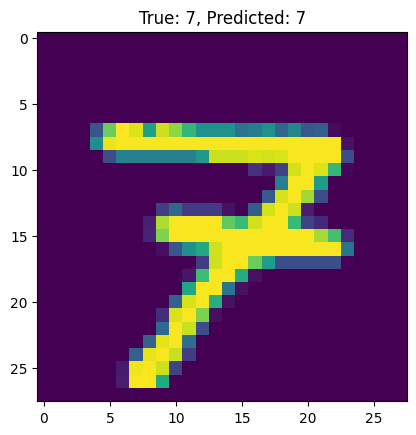

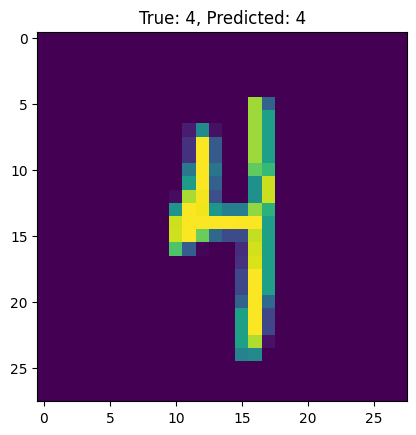

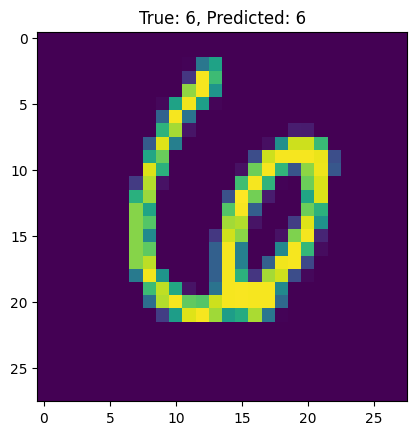

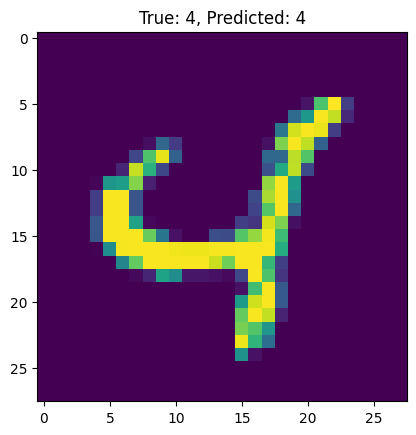

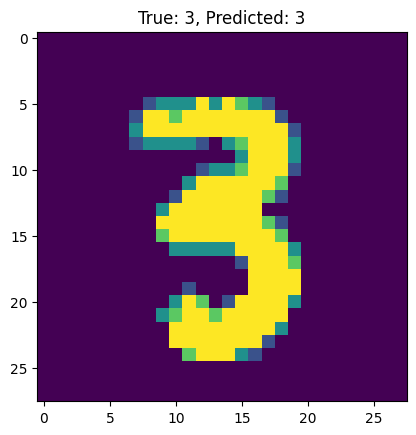

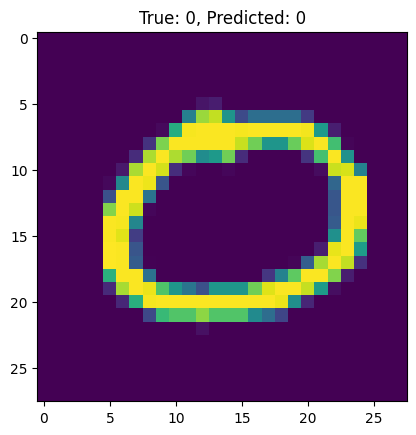

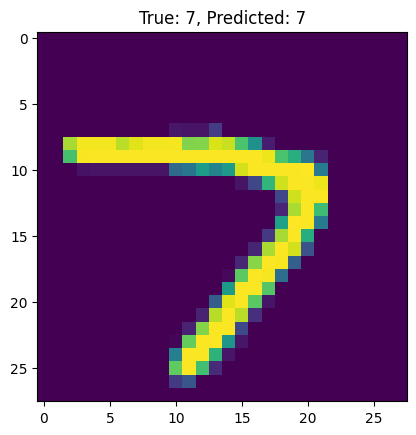

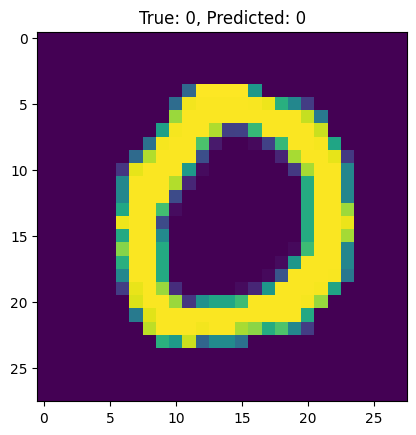

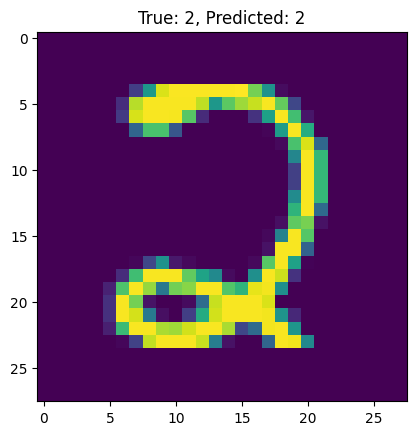

No incorrectly classified images to display.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan gambar dengan label
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Mendapatkan satu batch data pengujian
dataiter = iter(test_loader)
data = next(dataiter)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Melakukan prediksi
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Menampilkan gambar dengan prediksi
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Menampilkan prediksi yang benar
print("Gambar yang Terklasifikasi dengan Benar:")
for i in range(9):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Memeriksa apakah tensor tidak kosong sebelum mengakses elemennya
if torch.numel(incorrect_pred_indices) > 0:
    # Menampilkan prediksi yang salah
    print("Gambar yang Terklasifikasi Salah:")
    for i in range(min(3, torch.numel(incorrect_pred_indices))):
        index = incorrect_pred_indices.item() if torch.numel(incorrect_pred_indices) == 1 else incorrect_pred_indices[i]
        true_label = labels[index].item()
        predicted_label = predicted[index].item()

        # Menampilkan gambar beserta label asli dan label prediksi
        imshow(images[index].cpu(), f"True Label: {true_label}, Predicted Label: {predicted_label}")
else:
    print("Tidak ada gambar yang terklasifikasi salah untuk ditampilkan.")